In [1]:
from pylab import *
import copy

In [106]:
def gradiente(punto,vector_grad): # r es el vector de puntos
    """
        funcion para calcular el gradiente en un punto donde
        r es el vector
        son las componentes del gradiente
    """
    resultado=np.arange(len(punto))
    for i in range(len(punto)):
        resultado[i]=punto[i]*vector_grad[i]
    return [punto[0]*vector_grad[0],punto[1]*vector_grad[1]]

In [107]:
punto=[1,2]
vector_gradiente=[2,3]
print(gradiente(punto,vector_gradiente))

[2, 6]


## Formas diferentes de calcular el gradiente y evaluarlo

In [108]:
import autograd.numpy as np
from autograd import grad

def f(vector,a,b):
    return 0.5*(a*vector[0]**2 + b*vector[1]**2)  # ejemplo: función de 2 variables

## a y b coeficientes de la función que terminan formado el vector gradiente (por la forma de la funcion)
a=1
b=0.1
x = np.array([1.0, 2.0])
h = 1e-5
res_grad = np.array([(f(x + h * np.eye(2)[i],a,b) - f(x,a,b)) / h for i in range(2)])

print("Gradiente:", res_grad)
print("grandiente mio: ",gradiente(x,[a,b]))
grad_f = grad(f)
print("Gradiente:", grad_f(x,a,b))

Gradiente: [1.000005  0.2000005]
grandiente mio:  [np.float64(1.0), np.float64(0.2)]
Gradiente: [1.  0.2]


## Dibujamos un mapa de contornos para poder ver mejor las curvas de nivel

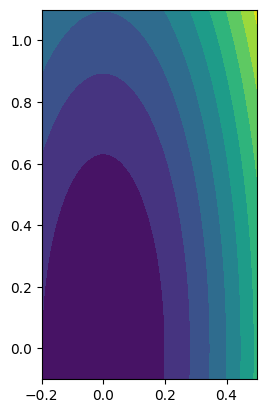

In [80]:
a = 1.0  # arbitrario elijo un a copado ==> a=1
b = 0.1  # el problema pide b<1
xx = np.linspace(-2*b, 0.5, num=100)
yy = np.linspace(-b, 1 + b, num=200)
X, Y = np.meshgrid(xx, yy, indexing='ij')
contourf(X, Y, f([X, Y], a, b), levels=10)
gca().set_aspect('equal')

Realizamos el proceso iterativo

$$ \mathbf{x}_{k+1} = \mathbf{x}_k - \alpha \nabla f (\mathbf{x}_k) $$
En ese caso como es un exact line search $$\alpha$$ se optimiza como 1/M donde M es el mayor autovalor del hessiano
La funcion a optimizar es
$$
    \frac{1}{2} *(x^2+b*y^2)
$$

Gradiente de la funcion es

$$

    [x,
    b*y
    ]^T
$$

In [114]:
cantidad_pasos=30
a=1
b=0.1
alpha=2.0/(1+b)
xk=np.zeros(cantidad_pasos+1)
yk=np.zeros(cantidad_pasos+1)

##arranco en el punto (b,a)

xk[0]=b
yk[0]=a
vector_gradiente=[a,b]
for i in range(cantidad_pasos):
    punto=[xk[i],yk[i]]
    print(punto[0],punto[1])
    print(gradiente(punto,vector_gradiente))
    xk[i+1]=xk[i]-alpha*gradiente(punto,vector_gradiente)[0]
    yk[i+1]=yk[i]-alpha*gradiente(punto,vector_gradiente)[1]
    

x_grad=copy.copy(xk)
y_grad=copy.copy(yk)




0.1 1.0
[np.float64(0.1), np.float64(0.1)]
-0.08181818181818182 0.8181818181818181
[np.float64(-0.08181818181818182), np.float64(0.08181818181818182)]
0.06694214876033058 0.6694214876033058
[np.float64(0.06694214876033058), np.float64(0.06694214876033058)]
-0.05477084898572501 0.5477084898572502
[np.float64(-0.05477084898572501), np.float64(0.05477084898572502)]
0.04481251280650228 0.44812512806502286
[np.float64(0.04481251280650228), np.float64(0.04481251280650229)]
-0.036664783205320045 0.3666478320532005
[np.float64(-0.036664783205320045), np.float64(0.03666478320532005)]
0.029998458986170942 0.2999845898617095
[np.float64(0.029998458986170942), np.float64(0.029998458986170953)]
-0.02454419371595804 0.24544193715958051
[np.float64(-0.02454419371595804), np.float64(0.024544193715958052)]
0.020081613040329307 0.20081613040329316
[np.float64(0.020081613040329307), np.float64(0.020081613040329318)]
-0.016430410669360344 0.16430410669360349
[np.float64(-0.016430410669360344), np.float64(

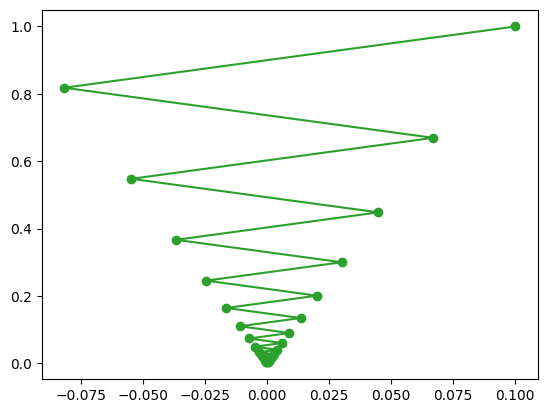

In [ ]:
contourf(X, Y, test_fn([X, Y], aa, bb), levels=15)
plot(xk, yk, color='C3', marker='o')
plot(x_gd, y_gd, color='C2', marker='o')
gca().set_aspect('equal')